### Graphic Reports on Substance Use Data using Plotly+Cufflinks - for Github render

### Modified the original notebook to covert report (static and interactive) to image in order to display in github

In [1]:
#! pip install psutil
# install orca (stand alone)

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"
import psutil
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import math
# Using plotly + cufflinks in offline mode
import plotly
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Using plotly + cufflinks in offline mode
import cufflinks # after upgrade to plotly 4.0 can’t use cufflinks any more.after install, go to int.py, tools.py, plotlytools.py in cufflinks package,changes plotly.plotly to chart_studio.plotly. then uninstall chart_studio, then install chart_studio
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

###!pip install plotly_express==0.4.0 # install plotly_express
import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

***The first time I ever saw a moving bubble chart was from [Hans Rosling's Ted Talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo) It was amazing!***

In [3]:
df = pd.read_excel('data/Substance-Use-Trend.xlsx')
df.head()

,Year,Substance,TotalUsers,DailyUse,StartAge
0,2002,Marijuana,11.0,12.2,17.0
1,2003,Marijuana,10.6,12.2,16.8
2,2004,Marijuana,10.6,12.7,17.1
3,2005,Marijuana,10.4,13.3,17.4
4,2006,Marijuana,10.3,12.3,17.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
Year          64 non-null int64
Substance     64 non-null object
TotalUsers    64 non-null float64
DailyUse      64 non-null float64
StartAge      64 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.6+ KB


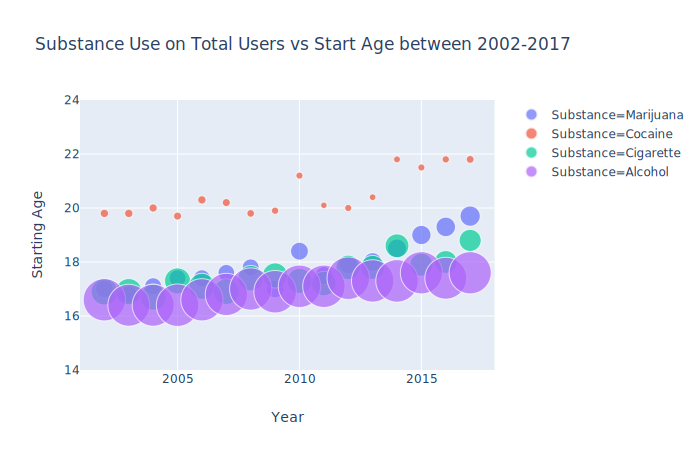

In [5]:
fig=px.scatter(df, x="Year", y="StartAge", 
           size="TotalUsers", color="Substance", hover_name="Substance",labels={"StartAge":'Starting Age',"TotalUsers":'% Substance Users'},
           log_x=False, size_max=30, range_x=[2001,2018], range_y=[14, 24],title='Substance Use on Total Users vs Start Age between 2002-2017',)
fig.show("svg")

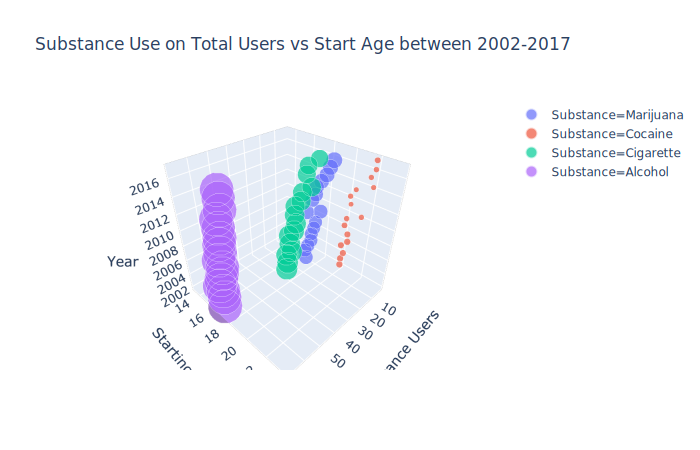

In [6]:
fig=px.scatter_3d(df, z="Year", y="StartAge", x="TotalUsers", 
           size="TotalUsers", color="Substance", hover_name="Substance",labels={"StartAge":'Starting Age',"TotalUsers":'% Substance Users'},
           log_x=False, size_max=55, range_x=[1,70], range_y=[13, 24],title='Substance Use on Total Users vs Start Age between 2002-2017',)

fig.show("svg")

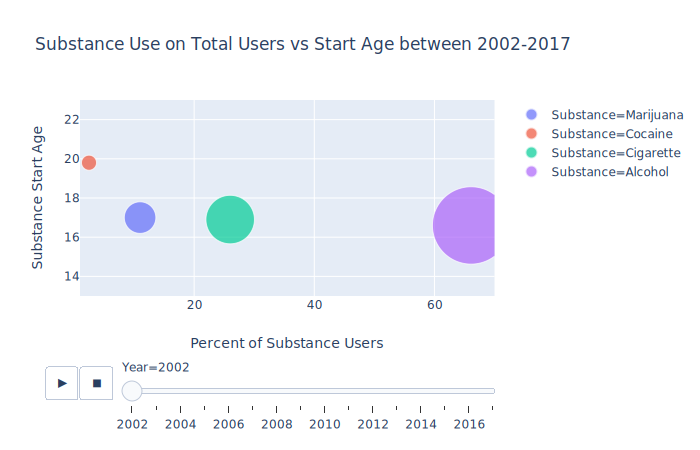

In [7]:
fig=px.scatter(df, x="TotalUsers", y="StartAge", animation_frame="Year", animation_group="Substance",
           size="TotalUsers", color="Substance", hover_name="Substance",labels={"TotalUsers":'Percent of Substance Users',"StartAge":'Substance Start Age'},
           log_x=False, size_max=55, range_x=[1,70], range_y=[13, 23],title='Substance Use on Total Users vs Start Age between 2002-2017',)

fig.show("svg")

In [8]:
dfAge = pd.read_excel('data/Substance-Use-Trend-by-Age.xlsx')
dfAge.head()

,Year,Substance,Age,DailyUse
0,2002,Alcohol,12-17,1.2
1,2003,Alcohol,12-17,1.0
2,2004,Alcohol,12-17,1.1
3,2005,Alcohol,12-17,0.9
4,2006,Alcohol,12-17,1.0


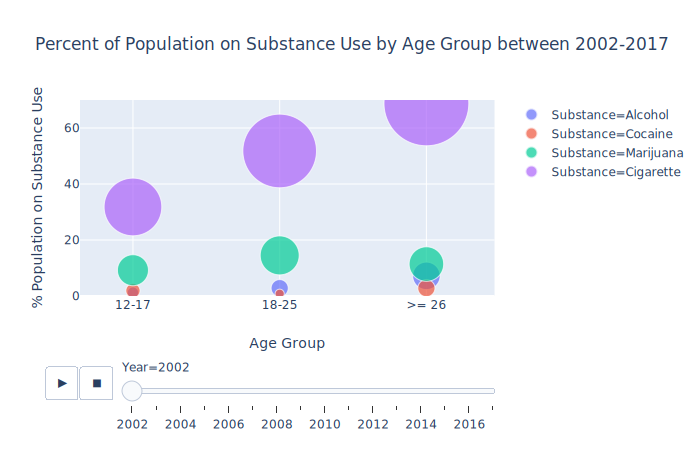

In [9]:
fig=px.scatter(dfAge, x="Age", y="DailyUse", size="DailyUse",
            color="Substance", animation_frame="Year", hover_name="Substance",labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},
           log_x=False, size_max=60, range_y=[0, 70],title='Percent of Population on Substance Use by Age Group between 2002-2017',)
fig.show("svg")

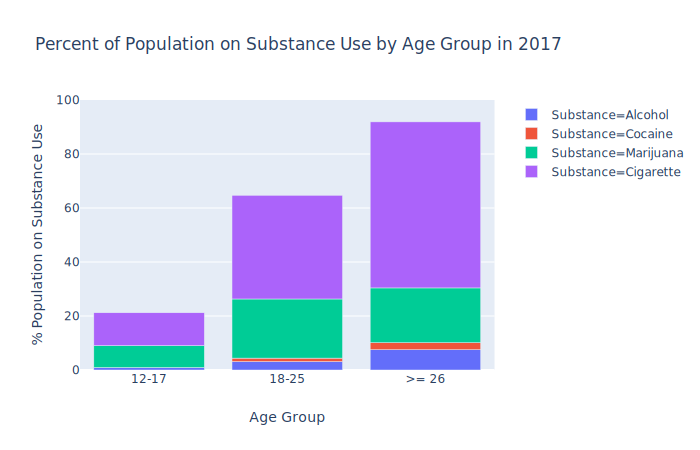

In [10]:
fig=px.bar(dfAge.query("Year=='2017'"), x="Age", y="DailyUse",
            color="Substance",  hover_name="Substance",labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},
           log_x=False,barmode='relative' ,height=500,width=700, range_y=[0, 100],title='Percent of Population on Substance Use by Age Group in 2017',)
fig.show("svg")

In [11]:
dfALH=dfAge.loc[dfAge.Substance=='Alcohol']
dfALH.shape

(48, 4)

In [12]:
dfALH=dfAge.query("Substance=='Alcohol'")
dfALH.shape

(48, 4)

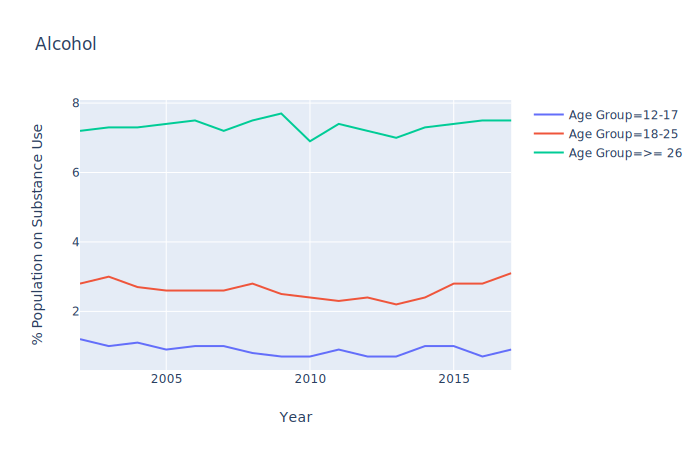

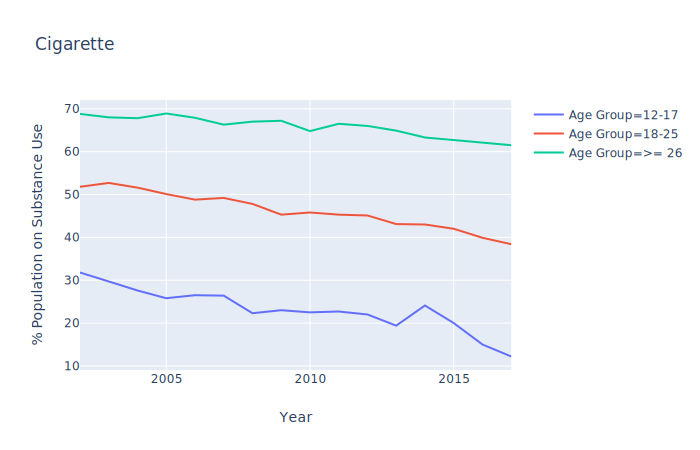

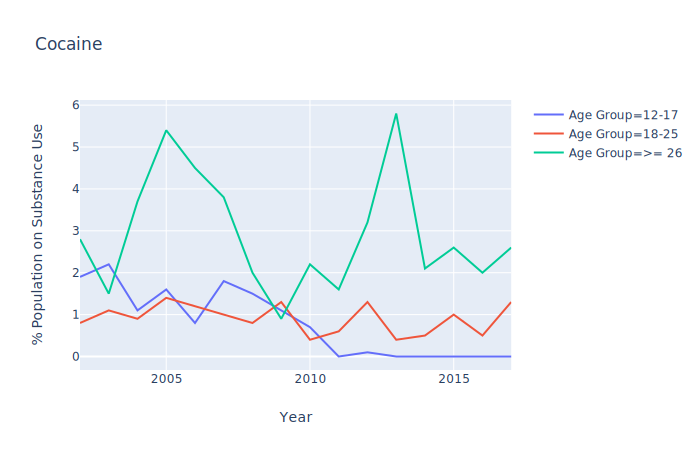

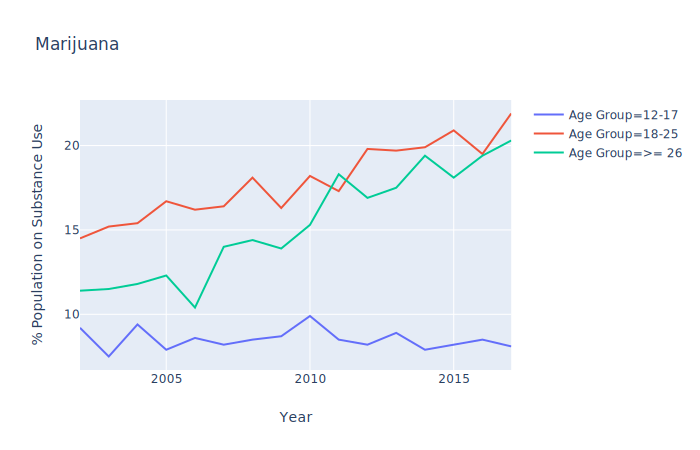

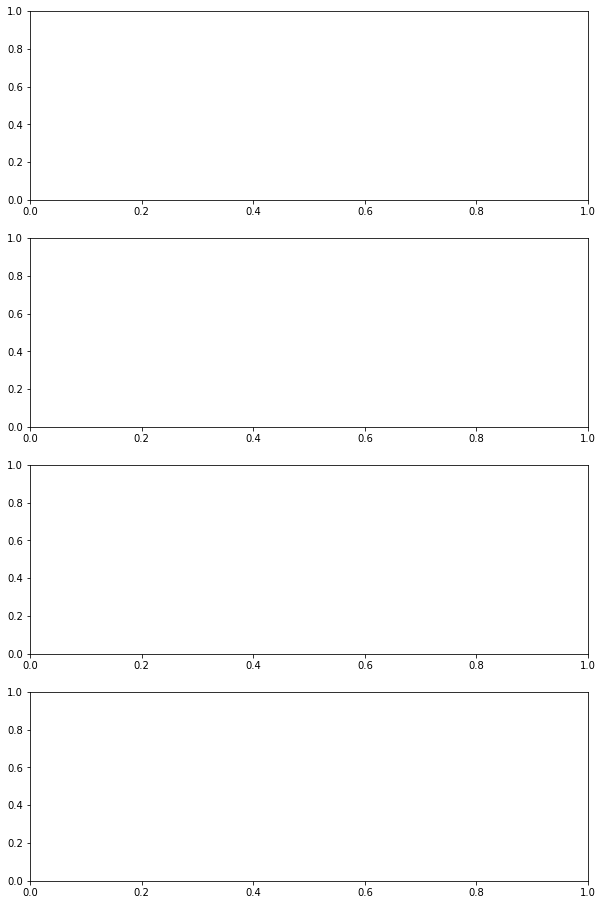

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(10,16))
#fig.suptitle('Horizontally stacked subplots')
ax1 =px.line(dfAge.query("Substance=='Alcohol'"), x='Year', y='DailyUse',color='Age',labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},title='Alcohol',width=600, height=350)

ax2 = px.line(dfAge.query("Substance=='Cigarette'"), x='Year', y='DailyUse', color='Age',labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},title='Cigarette',width=600, height=350)

ax3 = px.line(dfAge.query("Substance=='Cocaine'"), x='Year', y='DailyUse', color='Age',labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},title='Cocaine',width=600, height=350)

ax4 = px.line(dfAge.query("Substance=='Marijuana'"), x='Year', y='DailyUse', color='Age',labels={"Age":'Age Group',"DailyUse":'% Population on Substance Use'},title='Marijuana',width=600, height=350)

ax1.show("svg")
ax2.show("svg")
ax3.show("svg")
ax4.show("svg")


### Opioid Overdose Crisis
### Opioid overdoses have dramatically increased over the last two decades, with deaths increasing more than four times between 1999 and 2016. 

In [14]:
dfDeath = pd.read_excel('data/drug_overdose_deaths_1999_2016.xlsx')
dfDeath.head()

,Year,Category,Death Rate
0,1999,All,6.1
1,2000,All,6.2
2,2001,All,6.8
3,2002,All,8.2
4,2003,All,8.9


In [15]:
dfDeathT=pd.crosstab(dfDeath.Year,dfDeath.Category,values=dfDeath["Death Rate"], aggfunc='mean')
dfDeathT.head()

Category,All,All unintentional,Opioid,Opioid unintentional
Year,,,,
1999,6.1,4.0,2.9,2.1
2000,6.2,4.1,3.0,2.2
2001,6.8,4.6,3.3,2.4
2002,8.2,5.7,4.1,3.1
2003,8.9,6.3,4.5,3.4


In [16]:
dfDeathT['Non-Opioid']=dfDeathT['All']-dfDeathT['Opioid']
dfDeathT['Non-Opioid unintentional']=dfDeathT['All unintentional']-dfDeathT['Opioid unintentional']


In [17]:
dfDeathT.head()

Category,All,All unintentional,Opioid,Opioid unintentional,Non-Opioid,Non-Opioid unintentional
Year,,,,,,
1999,6.1,4.0,2.9,2.1,3.2,1.9
2000,6.2,4.1,3.0,2.2,3.2,1.9
2001,6.8,4.6,3.3,2.4,3.5,2.2
2002,8.2,5.7,4.1,3.1,4.1,2.6
2003,8.9,6.3,4.5,3.4,4.4,2.9


In [18]:
dfDeath=dfDeathT.stack().to_frame()
dfDeath=dfDeath.reset_index()
dfDeath.rename(columns={0: "Death Rate" },inplace=True)
dfDeath.head(10)

,Year,Category,Death Rate
0,1999,All,6.1
1,1999,All unintentional,4.0
2,1999,Opioid,2.9
3,1999,Opioid unintentional,2.1
4,1999,Non-Opioid,3.2
5,1999,Non-Opioid unintentional,1.9
6,2000,All,6.2
7,2000,All unintentional,4.1
8,2000,Opioid,3.0
9,2000,Opioid unintentional,2.2


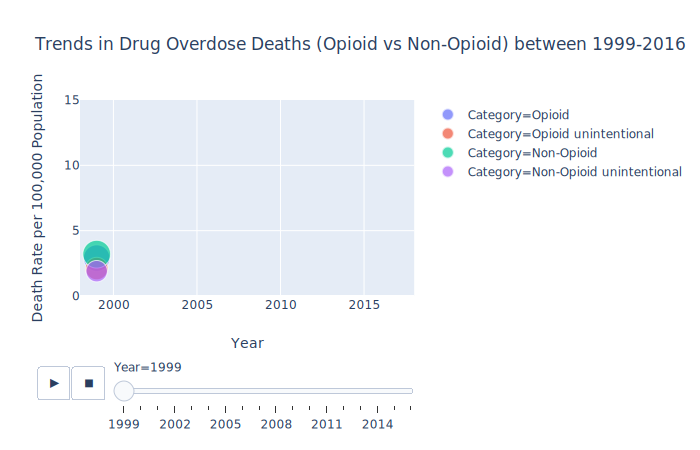

In [19]:
fig=px.scatter(dfDeath.query("Category=='Opioid' or Category=='Opioid unintentional' or Category=='Non-Opioid' or Category=='Non-Opioid unintentional'"),x='Year', y='Death Rate', size="Death Rate",
            color="Category", animation_frame="Year", hover_name="Death Rate",labels={"Death Rate":'Death Rate per 100,000 Population'},
           log_x=False, size_max=40, range_x=[1998, 2018], range_y=[0, 15],title='Trends in Drug Overdose Deaths (Opioid vs Non-Opioid) between 1999-2016',)
fig.show("svg")

In [20]:
dfDeathT.iplot(kind='box', dimensions=(600, 400), 
   title='Drug Overdose Deaths between 1999-2016',xTitle='Drug Overdose',yTitle='Death Rate per 100,000 Population')
#fig.show("svg")

In [21]:
dfDrug = pd.read_excel('data/drug_overdose_deaths_by_drug_1999_2016.xlsx')
dfDrug.head()

,Year,Drug,Death Rate
0,1999,Prescription opioids,1.2
1,2000,Prescription opioids,1.3
2,2001,Prescription opioids,1.7
3,2002,Prescription opioids,2.3
4,2003,Prescription opioids,2.6


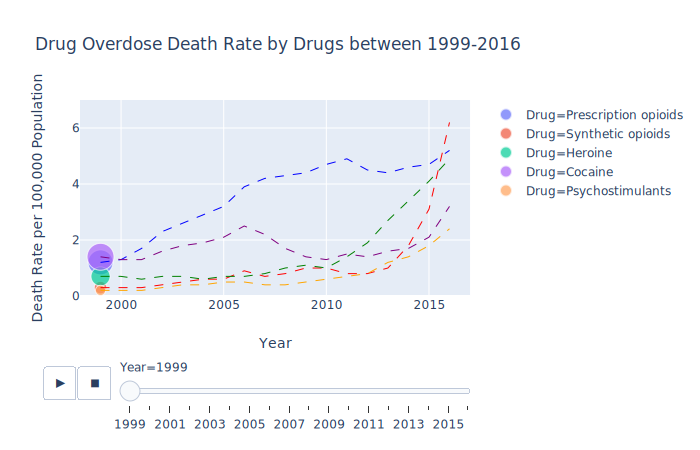

In [22]:
fig=px.scatter(dfDrug,x='Year', y='Death Rate', size="Death Rate",
            color="Drug", animation_frame="Year", hover_name="Death Rate",labels={"Death Rate":'Death Rate per 100,000 Population'},
           log_x=False, size_max=40, range_x=[1998, 2017], range_y=[0, 7],title='Drug Overdose Death Rate by Drugs between 1999-2016',)
fig.add_trace(go.Scatter(x= dfDrug.query("Drug=='Prescription opioids'")["Year"].values, y= dfDrug.query("Drug=='Prescription opioids'")["Death Rate"].values,
               mode='lines',line=dict(color='blue', width=1, dash='dash'),showlegend=False, name='Prescription opioids'))
fig.add_trace(go.Scatter(x= dfDrug.query("Drug=='Synthetic opioids'")["Year"].values, y= dfDrug.query("Drug=='Synthetic opioids'")["Death Rate"].values,
               mode='lines',line=dict(color='red', width=1, dash='dash'),showlegend=False, name='Synthetic opioids'))
fig.add_trace(go.Scatter(x= dfDrug.query("Drug=='Heroine'")["Year"].values, y= dfDrug.query("Drug=='Heroine'")["Death Rate"].values,
               mode='lines',line=dict(color='green', width=1, dash='dash'),showlegend=False, name='Heroine'))
fig.add_trace(go.Scatter(x= dfDrug.query("Drug=='Cocaine'")["Year"].values, y= dfDrug.query("Drug=='Cocaine'")["Death Rate"].values,
               mode='lines',line=dict(color='purple', width=1, dash='dash'),showlegend=False, name='Cocaine'))
fig.add_trace(go.Scatter(x= dfDrug.query("Drug=='Psychostimulants'")["Year"].values, y= dfDrug.query("Drug=='Psychostimulants'")["Death Rate"].values,
               mode='lines',line=dict(color='orange', width=1, dash='dash'),showlegend=False, name='Psychostimulants'))

fig.show("svg")

In [23]:
dfDrug.query("Year=='1999'")["Drug"].values

array(['Prescription opioids', 'Synthetic opioids', 'Heroine', 'Cocaine',
       'Psychostimulants'], dtype=object)

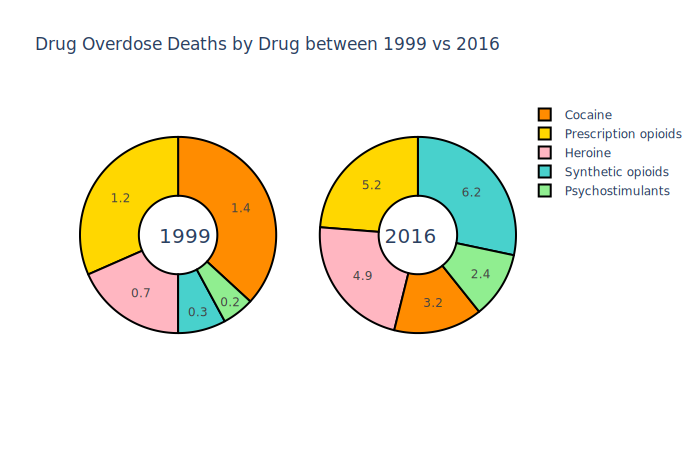

In [24]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#fig.add_trace(dfDrug.query("Year=='1999'").iplot(kind='pie',labels='Drug',values='Death Rate'),1, 1)
fig.add_trace(go.Pie(labels=dfDrug.query("Year=='1999'")["Drug"].values, values=dfDrug.query("Year=='1999'")["Death Rate"].values, name='1999'),1, 1)
fig.add_trace(go.Pie(labels=dfDrug.query("Year=='2016'")["Drug"].values, values=dfDrug.query("Year=='2016'")["Death Rate"].values, name='2016'),1, 2)
# Use `hole` to create a donut-like pie chart
colors = ['gold', 'mediumturquoise', 'lightpink',  'darkorange', 'lightgreen']
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='value',marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Drug Overdose Deaths by Drug between 1999 vs 2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='1999', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='2016', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show("svg")


In [25]:
dfDeathState = pd.read_excel('data/do_death_rate_by_state.xlsx')
dfDeathState.head()

,State,Death Rate
0,Alabama,16.2
1,Alaska,16.8
2,Arizona,20.3
3,Arkansas,14.0
4,California,11.2


In [26]:
stateAb={'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

In [27]:
dfDeathState['State Code']=dfDeathState['State'].map(stateAb)
dfDeathState.head()

,State,Death Rate,State Code
0,Alabama,16.2,AL
1,Alaska,16.8,AK
2,Arizona,20.3,AZ
3,Arkansas,14.0,AR
4,California,11.2,CA


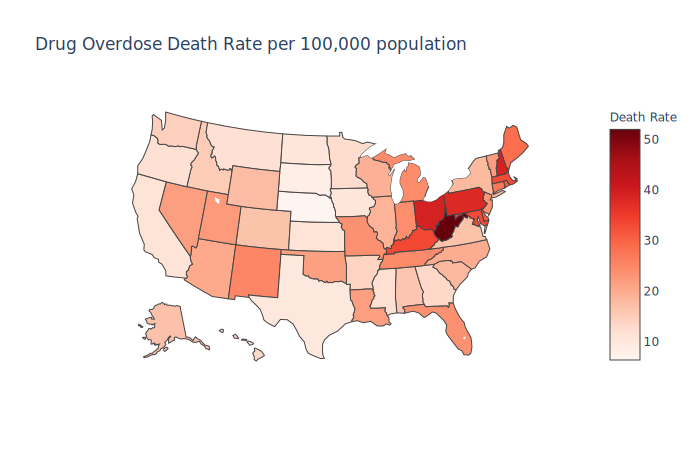

In [28]:
fig=px.choropleth(dfDeathState, locations="State Code",
                    color="Death Rate", 
                    hover_name="State", 
                    locationmode = 'USA-states',
                    scope='usa',
                    color_continuous_scale='Reds',
                    title='Drug Overdose Death Rate per 100,000 population')
fig.show("svg")

In [29]:
#Opioid prescription filled by age and gender2017
dfGender = pd.read_excel('data/Opioid by age and gender2017.xlsx')
dfGender.head()

,Agegroup,Gender,Number
0,0–14,Male,543052
1,0–14,Female,487263
2,15–19,Male,975802
3,15–19,Female,1220072
4,20–24,Male,1092400


In [30]:
dfGenderT=pd.crosstab(dfGender.Agegroup,dfGender.Gender,values=dfGender.Number, aggfunc='mean')
dfGenderT

Gender,Female,Male
Agegroup,,
0–14,487263,543052
15–19,1220072,975802
20–24,1803934,1092400
25–34,4939776,2919459
35–44,4951191,3428239
45–54,5557524,4239999
55–64,6061739,5011588
≥ 65,8007540,5695755


In [31]:
dfGenderT.iplot(kind='bar', dimensions=(600, 400), 
   title='Opioid prescription filled by age and gender for 2017',xTitle='Age Group',yTitle='Number of People')


In [32]:

dfGenderT.iplot(kind='line',dimensions=(600, 400), mode='lines+markers',title='Opioid prescription filled by age and gender for 2017',xTitle = 'Age Group', yTitle= 'Number of People'
)


### Data downloaded from National Survey on Drug Use and Health, 2014 https://www.icpsr.umich.edu/icpsrweb/NAHDAP/studies/36361


In [33]:
dfSurvey=pd.read_csv('36361-0001-Data.tsv',sep='\t',usecols=['ABODILL', 'ABODMRJ', 'ABODINH', 'ABODHER', 'ABODHAL', 'ABODCOC', 'ABODALC', 'ALCTRY', 'MJAGE', 'COCAGE', 'HERAGE', 'HALLAGE', 'INHAGE', 'SUMAGE'])
dfSurvey.head(10)

,ALCTRY,MJAGE,COCAGE,HERAGE,HALLAGE,INHAGE,SUMAGE,ABODALC,ABODCOC,ABODHAL,ABODHER,ABODINH,ABODMRJ,ABODILL
0,18,991,991,991,991,991,991,0,0,0,0,0,0,0
1,16,17,991,991,991,991,17,0,0,0,0,0,1,1
2,23,991,991,991,991,991,22,0,0,0,0,0,0,0
3,16,17,991,991,991,991,17,0,0,0,0,0,0,0
4,991,991,991,991,991,991,991,0,0,0,0,0,0,0
5,991,991,991,991,991,991,991,0,0,0,0,0,0,0
6,991,991,991,991,991,991,991,0,0,0,0,0,0,0
7,17,991,991,991,991,991,991,0,0,0,0,0,0,0
8,18,18,991,991,19,991,18,0,0,0,0,0,0,0
9,7,991,991,991,991,991,11,0,0,0,0,0,0,0


In [34]:
# no null values
dfSurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55271 entries, 0 to 55270
Data columns (total 14 columns):
ALCTRY     55271 non-null int64
MJAGE      55271 non-null int64
COCAGE     55271 non-null int64
HERAGE     55271 non-null int64
HALLAGE    55271 non-null int64
INHAGE     55271 non-null int64
SUMAGE     55271 non-null int64
ABODALC    55271 non-null int64
ABODCOC    55271 non-null int64
ABODHAL    55271 non-null int64
ABODHER    55271 non-null int64
ABODINH    55271 non-null int64
ABODMRJ    55271 non-null int64
ABODILL    55271 non-null int64
dtypes: int64(14)
memory usage: 5.9 MB


In [35]:
dfSurvey.query('ALCTRY <80 and MJAGE <80 and COCAGE <80 and HERAGE <80 and HALLAGE <80 and INHAGE <80 and SUMAGE <80', inplace = True)
dfSurvey.head()         

,ALCTRY,MJAGE,COCAGE,HERAGE,HALLAGE,INHAGE,SUMAGE,ABODALC,ABODCOC,ABODHAL,ABODHER,ABODINH,ABODMRJ,ABODILL
18,12,17,18,19,18,19,17,0,0,0,0,0,0,1
138,12,12,14,31,13,13,12,0,1,0,1,0,0,1
182,12,14,17,31,16,17,14,1,0,0,0,0,0,0
205,13,13,23,40,13,24,13,0,0,0,1,0,0,1
380,14,14,14,16,15,15,14,0,0,0,0,0,0,0


In [36]:
dfSurvey.shape

(421, 14)

In [37]:
dfSurveyAge=dfSurvey.iloc[:,0:7]
dfSurveyAge.head()

,ALCTRY,MJAGE,COCAGE,HERAGE,HALLAGE,INHAGE,SUMAGE
18,12,17,18,19,18,19,17
138,12,12,14,31,13,13,12
182,12,14,17,31,16,17,14
205,13,13,23,40,13,24,13
380,14,14,14,16,15,15,14


Variable definition

ABODILL  ILLICIT DRUG ABUSE OR DEPENDENCE 

ABODMRJ  MARIJUANA ABUSE OR DEPENDENCE

ABODINH  INHALANT ABUSE OR DEPENDENCE

ABODHER  HEROIN ABUSE OR DEPENDENCE

ABODHAL  HALLUCINOGEN ABUSE OR DEPENDENCE

ABODCOC  COCAINE ABUSE OR DEPENDENCE

ABODALC  ALCOHOL ABUSE OR DEPENDENCE 

ALCTRY  AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE

MJAGE  AGE WHEN FIRST USED MARIJUANA/HASHISH

COCAGE  AGE WHEN FIRST USED COCAINE

HERAGE  AGE WHEN FIRST USED HEROIN

HALLAGE  AGE WHEN FIRST USED HALLUCINOGENS

INHAGE  AGE WHEN FIRST USED INHALANTS

SUMAGE  ANY ILLICIT DRUG - AGE FIRST USE

### Substance first use age is more or less correlated, especially between ALCOHOL and ILLICIT DRUG

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017484CC0>,
      dtype=object)

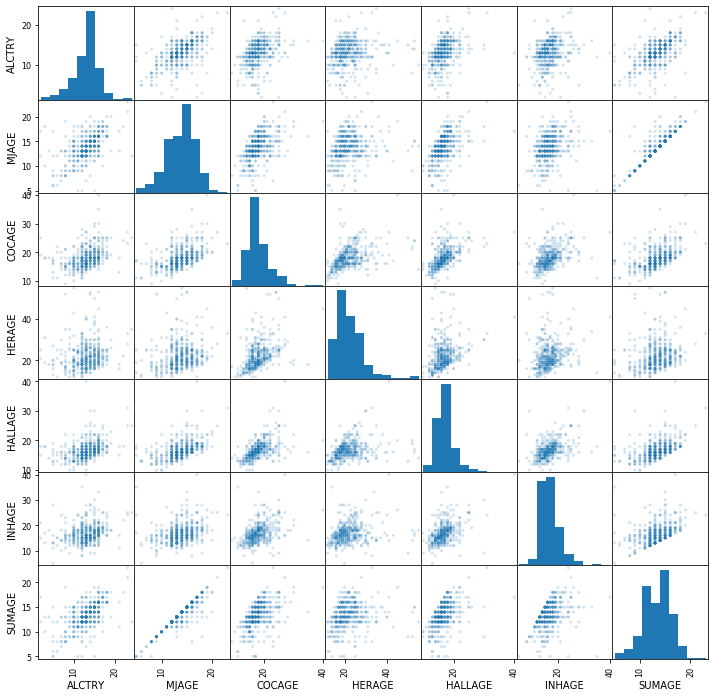

In [38]:
#plt.style.use('ggplot')
pd.plotting.scatter_matrix(dfSurveyAge, alpha=0.2, figsize=(12, 12))

In [39]:
def plot_distplot (df,dist,column, label):   
    x1 = df.loc[df[column] == 0, dist]
    x0 = df.loc[df[column] == 1, dist]
    hist_data = [x1, x0]
    group_labels = ['Negative', 'Positive' ]
    colors = ['blue', 'red']
    fig = ff.create_distplot(hist_data, group_labels,show_hist=False,colors=colors)
    fig.update_layout(title_text='Distribution of Alcohol Start Age grouped by ' + label + ' Abuse/Dependence')
    fig.show("svg")

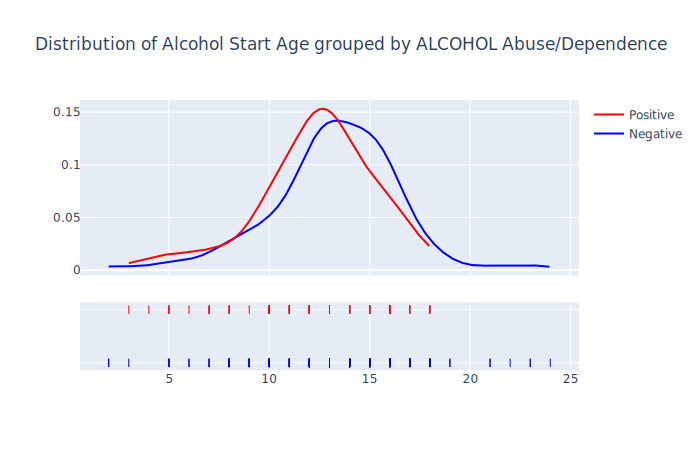

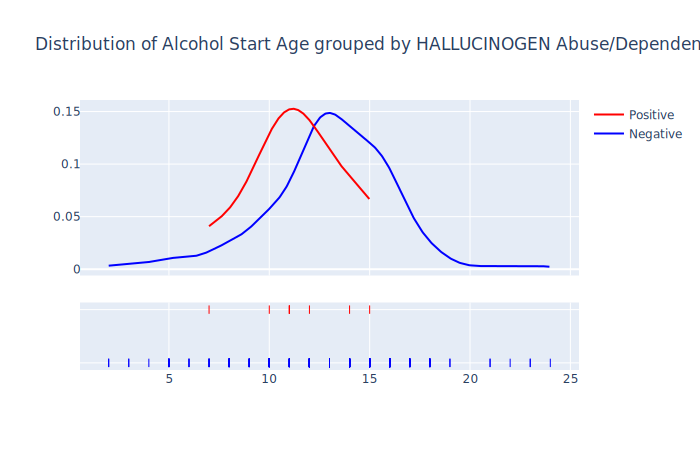

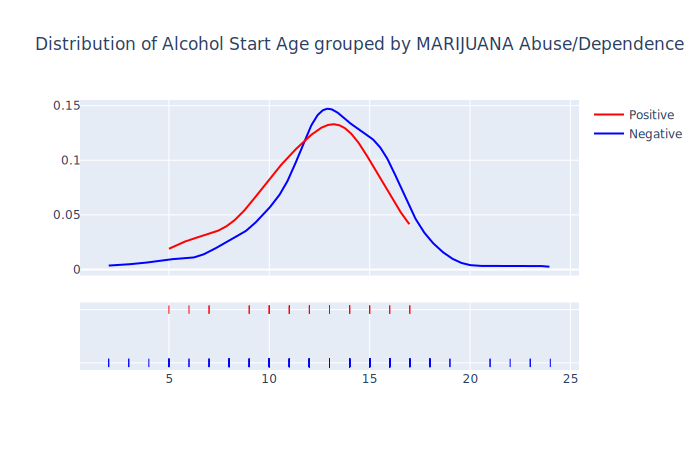

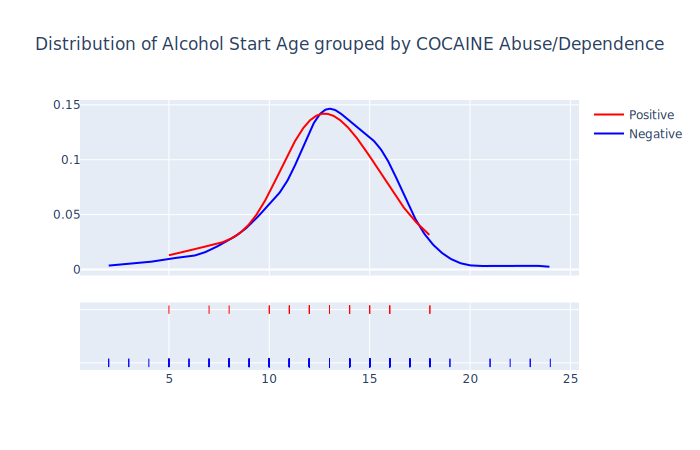

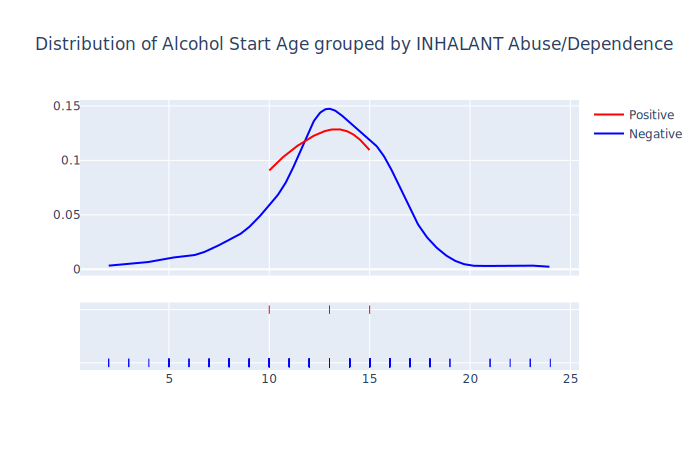

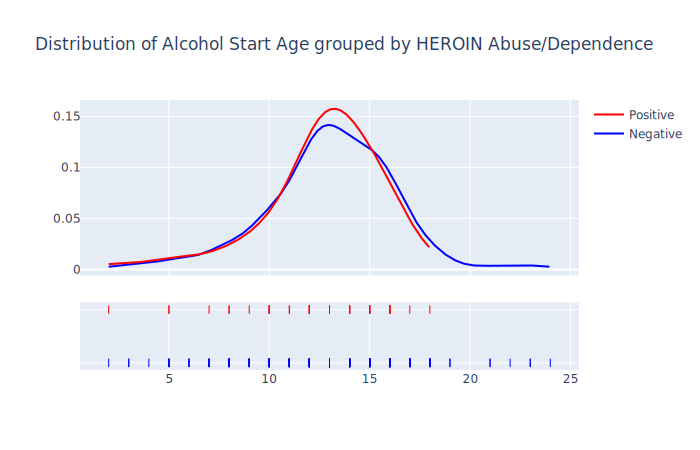

In [40]:
plot_distplot (dfSurvey,'ALCTRY','ABODALC', 'ALCOHOL')
plot_distplot (dfSurvey,'ALCTRY','ABODHAL', 'HALLUCINOGEN')
plot_distplot (dfSurvey,'ALCTRY','ABODMRJ', 'MARIJUANA')
plot_distplot (dfSurvey,'ALCTRY','ABODCOC', 'COCAINE')
plot_distplot (dfSurvey,'ALCTRY','ABODINH', 'INHALANT')
plot_distplot (dfSurvey,'ALCTRY','ABODHER', 'HEROIN')

### People with ALCOHOL or HALLUCINOGEN Abuse/Dependence have earlier alcohol start age than people with no respecitve drug Abuse/Dependence